In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from music21 import midi, environment

In [3]:
mf = midi.MidiFile()
mf.open('files/example.midi')
mf.read()
mf.close()
stream = midi.translate.midiFileToStream(mf)
us = environment.Environment()
path = '/opt/homebrew/bin/mscore'
us['musescoreDirectPNGPath'] = path

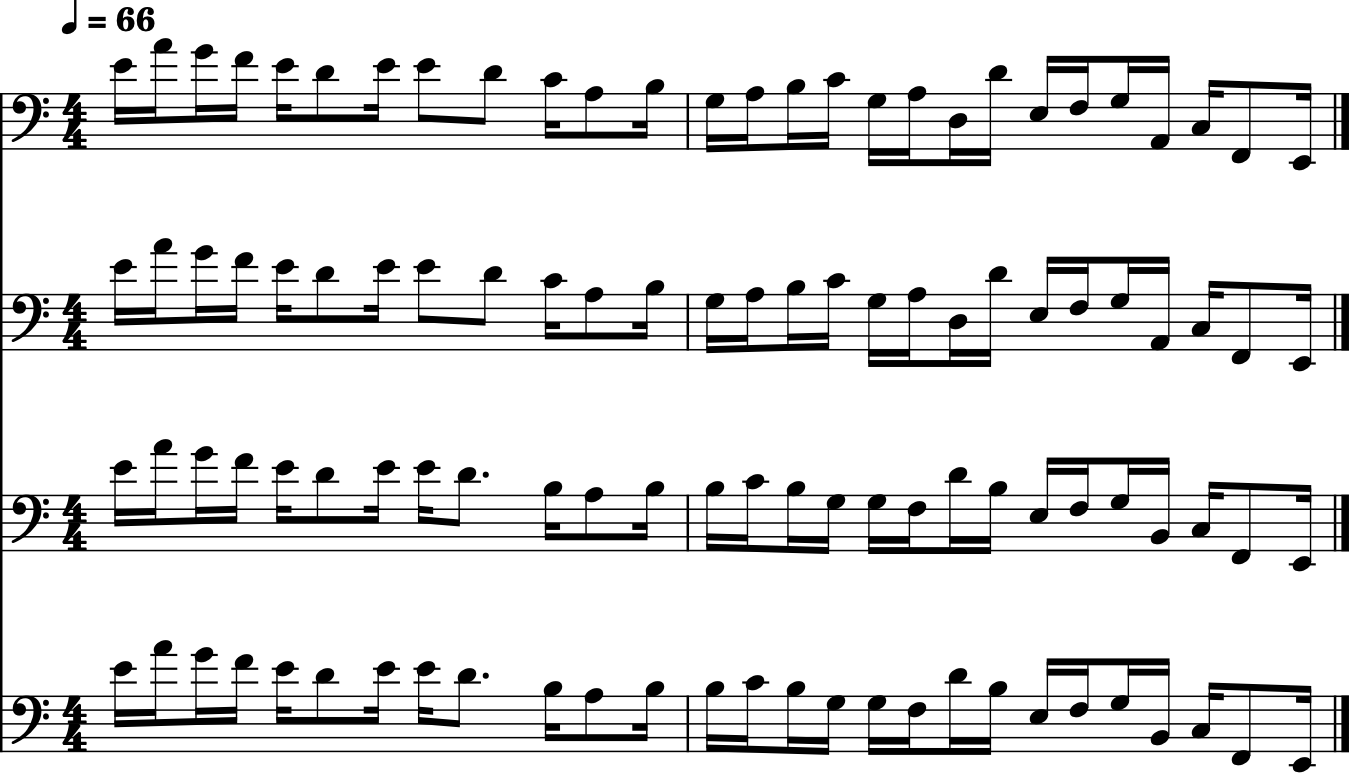

In [4]:
stream.show()

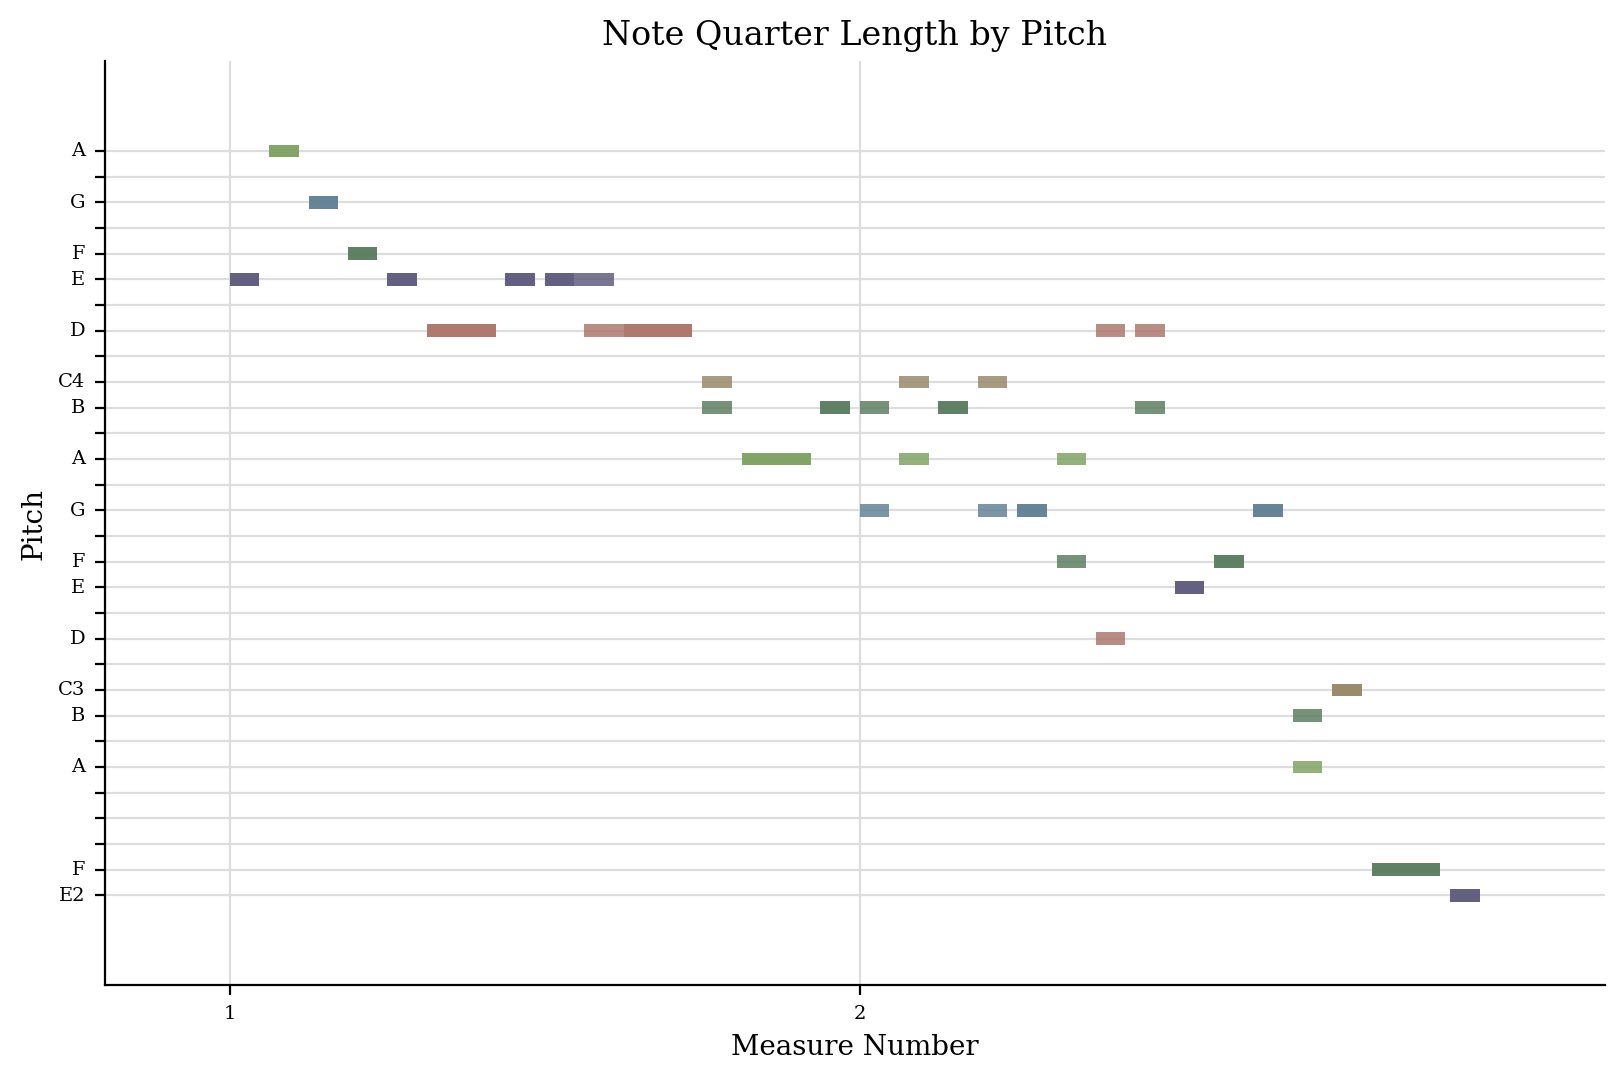

In [5]:
stream.plot()
plt.show()

In [6]:
for n in stream.recurse().notes:
    print(n.offset, n.pitches)

0.0 (<music21.pitch.Pitch E4>,)
0.25 (<music21.pitch.Pitch A4>,)
0.5 (<music21.pitch.Pitch G4>,)
0.75 (<music21.pitch.Pitch F4>,)
1.0 (<music21.pitch.Pitch E4>,)
1.25 (<music21.pitch.Pitch D4>,)
1.75 (<music21.pitch.Pitch E4>,)
2.0 (<music21.pitch.Pitch E4>,)
2.5 (<music21.pitch.Pitch D4>,)
3.0 (<music21.pitch.Pitch C4>,)
3.25 (<music21.pitch.Pitch A3>,)
3.75 (<music21.pitch.Pitch B3>,)
0.0 (<music21.pitch.Pitch G3>,)
0.25 (<music21.pitch.Pitch A3>,)
0.5 (<music21.pitch.Pitch B3>,)
0.75 (<music21.pitch.Pitch C4>,)
1.0 (<music21.pitch.Pitch G3>,)
1.25 (<music21.pitch.Pitch A3>,)
1.5 (<music21.pitch.Pitch D3>,)
1.75 (<music21.pitch.Pitch D4>,)
2.0 (<music21.pitch.Pitch E3>,)
2.25 (<music21.pitch.Pitch F3>,)
2.5 (<music21.pitch.Pitch G3>,)
2.75 (<music21.pitch.Pitch A2>,)
3.0 (<music21.pitch.Pitch C3>,)
3.25 (<music21.pitch.Pitch F2>,)
3.75 (<music21.pitch.Pitch E2>,)
0.0 (<music21.pitch.Pitch E4>,)
0.25 (<music21.pitch.Pitch A4>,)
0.5 (<music21.pitch.Pitch G4>,)
0.75 (<music21.pitch.Pitc

In [7]:
for n in stream.recurse().notes:
    print(n.offset,n.pitches[0].midi)

0.0 64
0.25 69
0.5 67
0.75 65
1.0 64
1.25 62
1.75 64
2.0 64
2.5 62
3.0 60
3.25 57
3.75 59
0.0 55
0.25 57
0.5 59
0.75 60
1.0 55
1.25 57
1.5 50
1.75 62
2.0 52
2.25 53
2.5 55
2.75 45
3.0 48
3.25 41
3.75 40
0.0 64
0.25 69
0.5 67
0.75 65
1.0 64
1.25 62
1.75 64
2.0 64
2.5 62
3.0 60
3.25 57
3.75 59
0.0 55
0.25 57
0.5 59
0.75 60
1.0 55
1.25 57
1.5 50
1.75 62
2.0 52
2.25 53
2.5 55
2.75 45
3.0 48
3.25 41
3.75 40
0.0 64
0.25 69
0.5 67
0.75 65
1.0 64
1.25 62
1.75 64
2.0 64
2.25 62
3.0 59
3.25 57
3.75 59
0.0 59
0.25 60
0.5 59
0.75 55
1.0 55
1.25 53
1.5 62
1.75 59
2.0 52
2.25 53
2.5 55
2.75 47
3.0 48
3.25 41
3.75 40
0.0 64
0.25 69
0.5 67
0.75 65
1.0 64
1.25 62
1.75 64
2.0 64
2.25 62
3.0 59
3.25 57
3.75 59
0.0 59
0.25 60
0.5 59
0.75 55
1.0 55
1.25 53
1.5 62
1.75 59
2.0 52
2.25 53
2.5 55
2.75 47
3.0 48
3.25 41
3.75 40


In [8]:
from torch.utils.data import DataLoader
from utils.midi_util import MidiDataset

In [9]:
dataset = MidiDataset('files/Jsb16thSeparated.npz')

In [10]:
first_song = dataset[0]

In [11]:
first_song.shape

torch.Size([4, 2, 16, 84])

In [12]:
loader = DataLoader(dataset, batch_size=64, shuffle=True, drop_last=True)

In [13]:
set(first_song.reshape(-1).tolist())

{-1.0, 1.0}

In [14]:
from music21 import note, duration, tempo, stream

In [15]:
parts = stream.Score()

In [16]:
parts.append(tempo.MetronomeMark(number=66))

In [17]:
max_pitches = np.argmax(first_song, axis=-1)

In [18]:
max_pitches

tensor([[[74, 74, 74, 74, 75, 75, 75, 75, 77, 77, 77, 77, 77, 77, 77, 77],
         [75, 75, 75, 75, 74, 74, 74, 74, 72, 72, 72, 72, 72, 72, 72, 72]],

        [[70, 70, 70, 70, 70, 70, 70, 70, 69, 69, 69, 69, 70, 70, 69, 69],
         [67, 67, 69, 69, 70, 70, 70, 70, 69, 69, 69, 69, 69, 69, 69, 69]],

        [[65, 65, 65, 65, 58, 58, 60, 60, 62, 62, 62, 62, 62, 62, 62, 62],
         [63, 63, 63, 63, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65]],

        [[58, 58, 58, 58, 55, 55, 55, 55, 50, 50, 50, 50, 55, 55, 55, 55],
         [48, 48, 48, 48, 46, 46, 46, 46, 53, 53, 53, 53, 53, 53, 53, 53]]])

In [19]:
midi_note_score = max_pitches.reshape(2*16, 4)

In [20]:
midi_note_score

tensor([[74, 74, 74, 74],
        [75, 75, 75, 75],
        [77, 77, 77, 77],
        [77, 77, 77, 77],
        [75, 75, 75, 75],
        [74, 74, 74, 74],
        [72, 72, 72, 72],
        [72, 72, 72, 72],
        [70, 70, 70, 70],
        [70, 70, 70, 70],
        [69, 69, 69, 69],
        [70, 70, 69, 69],
        [67, 67, 69, 69],
        [70, 70, 70, 70],
        [69, 69, 69, 69],
        [69, 69, 69, 69],
        [65, 65, 65, 65],
        [58, 58, 60, 60],
        [62, 62, 62, 62],
        [62, 62, 62, 62],
        [63, 63, 63, 63],
        [65, 65, 65, 65],
        [65, 65, 65, 65],
        [65, 65, 65, 65],
        [58, 58, 58, 58],
        [55, 55, 55, 55],
        [50, 50, 50, 50],
        [55, 55, 55, 55],
        [48, 48, 48, 48],
        [46, 46, 46, 46],
        [53, 53, 53, 53],
        [53, 53, 53, 53]])

In [21]:
for i in range(4):
    last_x = int(midi_note_score[:, i][0])
    s = stream.Part()
    dur = 0
    for idx, x in enumerate(midi_note_score[:, i]):
        x = int(x)
        if (x != last_x or idx % 4 == 0) and idx > 0:
            n = note.Note(last_x)
            n.duration = duration.Duration(dur)
            s.append(n)
            dur = 0
        last_x = x
        dur = dur + 0.25
    n = note.Note(last_x)
    n.duration = duration.Duration(dur)
    s.append(n)
    parts.append(s)
parts.write("midi", "files/first_song.midi")

'files/first_song.midi'

In [22]:
from utils.MuseGAN_util import MuseCritic, BarGenerator, MuseGenerator, init_weights, GradientPenalty 

In [23]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'

In [24]:
generator = MuseGenerator(z_dimension=32, hid_channels=1024, hid_features=1024, out_channels=1).to(device)
critic = MuseCritic(hid_channels=128, hid_features=1024, out_features=1).to(device)
generator = generator.apply(init_weights)
critic = critic.apply(init_weights)

Conv init...
Linear and BatchNorm init...
Conv init...
Linear and BatchNorm init...
Conv init...
Linear and BatchNorm init...
Conv init...
Linear and BatchNorm init...
Conv init...
Linear and BatchNorm init...
Conv init...
Linear and BatchNorm init...
Conv init...
Linear and BatchNorm init...
Conv init...
Linear and BatchNorm init...
Conv init...
Linear and BatchNorm init...
Conv init...
Linear and BatchNorm init...
Linear and BatchNorm init...
Conv init...
Linear and BatchNorm init...
Conv init...
Linear and BatchNorm init...
Conv init...
Linear and BatchNorm init...
Conv init...
Linear and BatchNorm init...
Conv init...
Linear and BatchNorm init...
Conv init...
Linear and BatchNorm init...
Conv init...
Linear and BatchNorm init...
Conv init...
Linear and BatchNorm init...
Conv init...
Linear and BatchNorm init...
Conv init...
Linear and BatchNorm init...
Conv init...
Linear and BatchNorm init...
Conv init...
Linear and BatchNorm init...
Conv init...
Linear and BatchNorm init...
Conv 

In [25]:
def loss_fn(pred, target):
    return -torch.mean(pred*target)

In [26]:
lr = 0.001
g_optimizer = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.9))
c_optimizer = torch.optim.Adam(critic.parameters(), lr=lr, betas=(0.5, 0.9))

In [27]:
batch_size=64
repeat=5
display_step=10
epochs=500
alpha=torch.rand((batch_size,1,1,1,1)).requires_grad_().to(device)
gp=GradientPenalty()

def noise():
    chords = torch.randn(batch_size, 32).to(device)
    style = torch.randn(batch_size, 32).to(device)
    melody = torch.randn(batch_size, 4, 32).to(device)
    groove = torch.randn(batch_size, 4, 32).to(device)
    return chords,style,melody,groove

In [28]:
from tqdm import tqdm
def train_epoch():
    e_gloss = 0
    e_closs = 0
    for real in tqdm(loader):
        real = real.to(device)
        # Train Critic
        for _ in range(repeat):
            chords,style,melody,groove=noise()
            c_optimizer.zero_grad()
            with torch.no_grad():
                fake = generator(chords, style, melody,groove).detach()
            realfake = alpha * real + (1 - alpha) * fake
            fake_pred = critic(fake)
            real_pred = critic(real)
            realfake_pred = critic(realfake)
            fake_loss =  loss_fn(fake_pred,-torch.ones_like(fake_pred))
            real_loss = loss_fn(real_pred,torch.ones_like(real_pred))
            penalty = gp(realfake, realfake_pred)
            closs = fake_loss + real_loss + 10 * penalty
            closs.backward(retain_graph=True)
            c_optimizer.step()
            e_closs += closs.item() / (repeat*len(loader))
        # train generator
        g_optimizer.zero_grad()
        chords,style,melody,groove=noise()
        fake = generator(chords, style, melody, groove)
        fake_pred = critic(fake)
        gloss = loss_fn(fake_pred, torch.ones_like(fake_pred))
        gloss.backward()
        g_optimizer.step()
        e_gloss += gloss.item() / len(loader)
    return e_gloss, e_closs

In [29]:
# for epoch in range(1,epochs+1):
#     e_gloss, e_closs = train_epoch()
#     if epoch % display_step == 0:
#         print(f"Epoch {epoch}, G loss {e_gloss} C loss {e_closs}")

In [30]:
# torch.save(generator.state_dict(), 'files/muse_generator.pth')

In [31]:
state_dict = torch.load('files/muse_generator.pth')

In [32]:
generator.load_state_dict(state_dict)

<All keys matched successfully>

In [39]:
num_pieces = 5
for i in range(10):
    chords = torch.rand(num_pieces, 32).to(device)
    style = torch.rand(num_pieces, 32).to(device)
    melody = torch.rand(num_pieces, 4, 32).to(device)
    groove = torch.rand(num_pieces, 4, 32).to(device)
    preds = generator(chords, style, melody, groove).detach()
    from utils.midi_util import convert_to_midi
    music_data = convert_to_midi(preds.cpu().numpy())
    music_data.write('midi', f'files/MuseGAN_song_{i}.midi')